# CCD example calculation

Solve Pairing model in CCD approximation

s.p. states (p,sigma) are 8. 

(p,sigma) = [(1,1),(1,-1),(2,1),(2,-1),(3,1),(3,-1),(4,1),(4,-1)]

Number of particle is 4. Thus, Reference includes (0,1,2,3) states. 


## But, first start from MBPT and FCI calculation 

Note this code is not for efficiency.

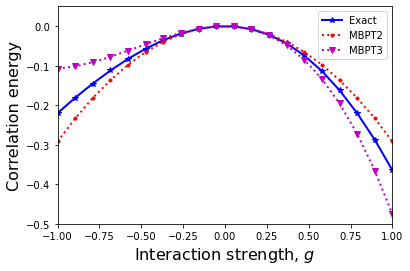

In [3]:
#!/usr/bin/python
from sympy import *
from pylab import *
import matplotlib.pyplot as plt

#---s.p. levels/states---------
below_fermi = (0,1,2,3)
above_fermi = (4,5,6,7)
states = [(1,1),(1,-1),(2,1),(2,-1),(3,1),(3,-1),(4,1),(4,-1)] # (p,sigma)
g = Symbol('g')

#---Hamiltonian-------------
# E(p,sigma) = delta*(p-1)
def h0(p,q):
    if p == q:
        p1, s1 = states[p]
        return (p1 - 1)
    else:
        return 0
    
# Fock term f
def f(p,q):
    if p == q:
        return 0
    s = h0(p,q)
    for i in below_fermi:
        s += assym(p,i,q,i)
        return s

#---- v(p,q,r,s) = -0.5*g*( p+,p-,q-,q+) 
def assym(p,q,r,s):
    p1, s1 = states[p]
    p2, s2 = states[q]
    p3, s3 = states[r]
    p4, s4 = states[s]

    if p1 != p2 or p3 != p4:
        return 0
    if s1 == s2 or s3 == s4:
        return 0
    if s1 == s3 and s2 == s4:
        return -g/2.
    if s1 == s4 and s2 == s3:
        return g/2.

#---sum of s.p. energies 
# eps = e_i+e_j-e_a-e_b 
def eps(holes, particles):
    E = 0
    for h in holes:
        p, s = states[h]
        E += (p-1)
    for p in particles:
        p, s = states[p]
        E -= (p-1)
    return E


# Diagram 1 in MBPT2 
s1 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                s1 += 0.25*assym(a,b,i,j)*assym(i,j,a,b)/eps((i,j),(a,b))


# Diagram 2 is zero for pairing model 

# Diagram 3 in MBPT3 
s3 = 0
for a in above_fermi:
   for b in above_fermi:
       for c in above_fermi:
           for i in below_fermi:
               for j in below_fermi:
                   for k in below_fermi:
                       s3 += assym(i,j,a,b)*assym(a,c,j,k)*assym(b,k,c,i)/eps((i,j),(a,b))/eps((k,j),(a,c))

# Diagram 4 in MBPT3 
s4 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for d in above_fermi:
                for i in below_fermi:
                    for j in below_fermi:
                        s4 += 0.125*assym(i,j,a,b)*assym(a,b,c,d)*assym(c,d,i,j)/eps((i,j),(a,b))/eps((i,j),(c,d))

# Diagram 5 MBPT3
s5 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                for k in below_fermi:
                    for l in below_fermi:
                        s5 += 0.125*assym(i,j,a,b)*assym(k,l,i,j)*assym(a,b,k,l)/eps((i,j),(a,b))/eps((k,l),(a,b))

# Diagram 6,7 are zero for pairing model                         
                        
# Diagram 8 are zero for pairing model
s8 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                for k in below_fermi:
                    s8 -= 0.5*assym(i,j,a,b)*assym(a,b,i,k)*f(k,j)/eps((i,j),(a,b))/eps((i,k),(a,b))

# Diagram 9 are zero for pairing model  
s9 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for i in below_fermi:
                for j in below_fermi:
                    s9 += 0.5*assym(i,j,a,b)*assym(a,c,i,j)*f(b,c)/eps((i,j),(a,b))/eps((i,j),(a,c))

ga = linspace(-1,1,20)
e1 = []
corr2 = []
corr3 = []

for g_val in ga:
    H1 = matrix([[2-g_val , -g_val/2.,  -g_val/2., -g_val/2., -g_val/2.,     0],
                 [-g_val/2.,   4-g_val,  -g_val/2., -g_val/2.,    0., -g_val/2.],
                 [-g_val/2., -g_val/2.,    6-g_val,     0, -g_val/2., -g_val/2.],
                 [-g_val/2., -g_val/2.,      0,   6-g_val, -g_val/2., -g_val/2.],
                 [-g_val/2.,     0,  -g_val/2., -g_val/2.,   8-g_val, -g_val/2.],
                 [0    , -g_val/2.,  -g_val/2., -g_val/2., -g_val/2.,  10-g_val]])

    u1, v1 = linalg.eig(H1)
    e1.append(min(u1)) # exact sol 
    corr2.append((s1).subs(g,g_val)) # MBPT2 # subs because 'g' is symbol 
    corr3.append((s1+s3+s4+s5).subs(g,g_val)) # MBPT3 # subs because 'g' is symbol

exact = e1 - (2-ga) # correlation energy = E - E_0 

plt.axis([-1,1,-0.5,0.05])
plt.xlabel(r'Interaction strength, $g$', fontsize=16)
plt.ylabel(r'Correlation energy', fontsize=16)
fci = plt.plot(ga, exact,'b-*',linewidth = 2.0, label = 'Exact')
mbpt2 = plt.plot(ga, corr2,'r:.', linewidth = 2.0, label = 'MBPT2')
mbpt3 = plt.plot(ga, corr3, 'm:v',linewidth = 2.0, label = 'MBPT3')
plt.legend()
#plt.savefig('perturbationtheory.pdf', format='pdf')
plt.show()

* In this calculation s.p. basis is just $H_0$ eigen-states. 
* On the other hand, the result is different from the book.
* In pairing model, total h_{alpha,beta} is diagonal already in s.p. basis.
  And no 1p-1h excitation is possible. Thus no HF calculation is necessary.  

## CCD for pairing model

* Potential is only non-zero for the types of $< ab|v|cd>$, $< ij|v|kl>$ and $< ab|v|ij>$. 
        
* Fock term is (in HF basis) $ < p|f|q> =< p|H_0|q>+\sum_{i<=F} < pi|V|qi> $.
  We only need $f_{pp}$ and $f_{hh}$ type. $<p|H_0|q>$ is diagonal. The second term is non-zero only when $p,q$ is holes.
  Also, it is non-zero only when $p=q=j$ and $|i-j|=1$.   
  
* code use intermediates

* code use einsum operation 

       Result = einsum("dimension notation of A, dimension notation of B,...->Result Dimension", A, B, ...)

In [4]:
## Coupled clusters in CCD approximation
## Implemented for the pairing model of Lecture Notes in Physics 936, Chapter 8.
## Thomas Papenbrock, June 2018

import numpy as np


def init_pairing_v(g,pnum,hnum):
    """
    returns potential matrices of the pairing model in three relevant channels
    
    param g: strength of the pairing interaction, as in Eq. (8.42)
    param pnum: number of particle states
    param hnum: number of hole states
    
    return v_pppp, v_pphh, v_hhhh: np.array(pnum,pnum,pnum,pnum), 
                                   np.array(pnum,pnum,hnum,hnum), 
                                   np.array(hnum,hnum,hnum,hnum), 
                                   The interaction as a 4-indexed tensor in three channels.
    """
    v_pppp=np.zeros((pnum,pnum,pnum,pnum))
    v_pphh=np.zeros((pnum,pnum,hnum,hnum))
    v_hhhh=np.zeros((hnum,hnum,hnum,hnum))
    
    gval=-0.5*g
    for a in range(0,pnum,2):
        for b in range(0,pnum,2):
            v_pppp[a,a+1,b,b+1]=gval
            v_pppp[a+1,a,b,b+1]=-gval
            v_pppp[a,a+1,b+1,b]=-gval
            v_pppp[a+1,a,b+1,b]=gval
            
    for a in range(0,pnum,2):
        for i in range(0,hnum,2):
            v_pphh[a,a+1,i,i+1]=gval
            v_pphh[a+1,a,i,i+1]=-gval
            v_pphh[a,a+1,i+1,i]=-gval
            v_pphh[a+1,a,i+1,i]=gval
    
    for j in range(0,hnum,2):
        for i in range(0,hnum,2):
            v_hhhh[j,j+1,i,i+1]=gval
            v_hhhh[j+1,j,i,i+1]=-gval
            v_hhhh[j,j+1,i+1,i]=-gval
            v_hhhh[j+1,j,i+1,i]=gval
        
    return v_pppp, v_pphh, v_hhhh
        
def init_pairing_fock(delta,g,pnum,hnum):
    """
    initializes the Fock matrix of the pairing model
    
    param delta: Single-particle spacing, as in Eq. (8.41)
    param g: pairing strength, as in eq. (8.42)
    param pnum: number of particle states
    param hnum: number of hole states
    
    return f_pp, f_hh: The Fock matrix in two channels as numpy arrays np.array(pnum,pnum), np.array(hnum,hnum). 
    """
# the Fock matrix for the pairing model. No f_ph needed, because we are in Hartree-Fock basis 
    deltaval=0.5*delta  # this is because we will multiply even numbers.
    gval=-0.5*g
    f_pp = np.zeros((pnum,pnum))
    f_hh = np.zeros((hnum,hnum))

    for i in range(0,hnum,2): # diagonal hole
        f_hh[i  ,i  ] = deltaval*i+gval
        f_hh[i+1,i+1] = deltaval*i+gval
        
    for a in range(0,pnum,2): # diagnoal particle  # 2 delta or 3 delta for particles.
        f_pp[a  ,a  ] = deltaval*(hnum+a)
        f_pp[a+1,a+1] = deltaval*(hnum+a)
    
    return f_pp, f_hh


def init_t2(v_pphh,f_pp,f_hh):
    """
    Initializes t2 amlitudes as in MBPT2, see first equation on page 345
    
    param v_pphh: pairing tensor in pphh channel
    param f_pp:   Fock matrix in pp channel
    param f_hh:   Fock matrix in hh channel
    
    return t2: numpy array in pphh format, 4-indices tensor
    """
    pnum = len(f_pp)
    hnum = len(f_hh)
    t2_new = np.zeros((pnum,pnum,hnum,hnum))
    for i in range(hnum):
        for j in range(hnum):
            for a in range(pnum):
                for b in range(pnum):
                    t2_new[a,b,i,j] = v_pphh[a,b,i,j] / (f_hh[i,i]+f_hh[j,j]-f_pp[a,a]-f_pp[b,b])
    return t2_new


# CCD equations. Note that the "->abij" assignment is redundant, because indices are ordered alphabetically.
# Nevertheless, we retain it for transparency.
def ccd_iter(v_pppp,v_pphh,v_hhhh,f_pp,f_hh,t2):
    """
    Performs one iteration of the CCD equations (8.34), using also intermediates for the nonliniar terms
    
    param v_pppp: pppp-channel pairing tensor, numpy array
    param v_pphh: pphh-channel pairing tensor, numpy array
    param v_hhhh: hhhh-channel pairing tensor, numpy array
    param f_pp: Fock matrix in pp channel
    param f_hh: Fock matrix in hh channel
    param t2: Initial t2 amplitude, tensor in form of pphh channel
    
    return t2_new: new t2 amplitude, tensor in form of pphh channel
    """
    pnum = len(f_pp)
    hnum = len(f_hh)
    #---- CCD equation for pphh.
    Hbar_pphh = (  v_pphh 
                 + np.einsum('bc,acij->abij',f_pp,t2) 
                 - np.einsum('ac,bcij->abij',f_pp,t2) # anti-symmetrization P(ab) role  
                 - np.einsum('abik,kj->abij',t2,f_hh)
                 + np.einsum('abjk,ki->abij',t2,f_hh) # P(ij) role 
                 + 0.5*np.einsum('abcd,cdij->abij',v_pppp,t2) 
                 + 0.5*np.einsum('abkl,klij->abij',t2,v_hhhh)
                )

    # hh intermediate, see (8.47)
    chi_hh = 0.5* np.einsum('cdkl,cdjl->kj',v_pphh,t2)

    Hbar_pphh = Hbar_pphh - (  np.einsum('abik,kj->abij',t2,chi_hh) 
                             - np.einsum('abik,kj->abji',t2,chi_hh) )

    # pp intermediate, see (8.46)
    chi_pp = -0.5* np.einsum('cdkl,bdkl->cb',v_pphh,t2)

    Hbar_pphh = Hbar_pphh + (  np.einsum('acij,cb->abij',t2,chi_pp) 
                             - np.einsum('acij,cb->baij',t2,chi_pp) )

    # hhhh intermediate, see (8.48)
    chi_hhhh = 0.5 * np.einsum('cdkl,cdij->klij',v_pphh,t2)

    Hbar_pphh = Hbar_pphh + 0.5 * np.einsum('abkl,klij->abij',t2,chi_hhhh)

    # phph intermediate, see (8.49)
    chi_phph= + 0.5 * np.einsum('cdkl,dblj->bkcj',v_pphh,t2)


    Hbar_pphh = Hbar_pphh + (  np.einsum('bkcj,acik->abij',chi_phph,t2)
                             - np.einsum('bkcj,acik->baij',chi_phph,t2)
                             - np.einsum('bkcj,acik->abji',chi_phph,t2)
                             + np.einsum('bkcj,acik->baji',chi_phph,t2) )
                 
    t2_new=np.zeros((pnum,pnum,hnum,hnum))
    for i in range(hnum):
        for j in range(hnum):
            for a in range(pnum):
                for b in range(pnum):
                    t2_new[a,b,i,j] = (  t2[a,b,i,j] 
                                       + Hbar_pphh[a,b,i,j] / (f_hh[i,i]+f_hh[j,j]-f_pp[a,a]-f_pp[b,b]) )

    return t2_new


def ccd_energy(v_pphh,t2):
    """
    Computes CCD energy. Call as 
    energy = ccd_energy(v_pphh,t2)
    
    param v_pphh: pphh-channel pairing tensor, numpy array
    param t2: t2 amplitude, tensor in form of pphh channel
    
    return energy: CCD correlation energy
    """
    erg = 0.25*np.einsum('abij,abij',v_pphh,t2)
    return erg

###############################
######## Main Program

# set parameters as for model
pnum = 4 # number of particle states
hnum = 4 # number of hole states
delta = 1.0

ga = linspace(-1,1,20)
e_ccd = []

for g in ga:
    print("parameters")
    print("delta =", delta, ", g =", g)
    # Initialize pairing matrix elements and Fock matrix
    v_pppp, v_pphh, v_hhhh = init_pairing_v(g,pnum,hnum)
    f_pp, f_hh = init_pairing_fock(delta,g,pnum,hnum)
    # Initialize T2 amplitudes from MBPT2
    t2 = init_t2(v_pphh,f_pp,f_hh)
    erg = ccd_energy(v_pphh,t2)
    # Exact MBPT2 for comparison, see last equation on page 365 
    exact_mbpt2 = -0.25*g**2*(1.0/(2.0+g) + 2.0/(4.0+g) + 1.0/(6.0+g))
    print("MBPT2 energy =", erg, ", compared to exact:", exact_mbpt2)
    # iterate CCD equations niter times
    niter=60
    for iter in range(niter):
        t2_new = ccd_iter(v_pppp,v_pphh,v_hhhh,f_pp,f_hh,t2)
        erg = ccd_energy(v_pphh,t2_new)
        #print("iter=", iter, "erg=", erg)
        t2 = 0.5 * (t2_new + t2) #mixed update. 
    print("iter=", iter, "erg=", erg)    
    e_ccd.append(erg) # store    

parameters
delta = 1.0 , g = -1.0
MBPT2 energy = -0.46666666666666673 , compared to exact: -0.4666666666666666
iter= 59 erg= -0.21895222678545145
parameters
delta = 1.0 , g = -0.8947368421052632
MBPT2 energy = -0.34918284703546393 , compared to exact: -0.34918284703546393
iter= 59 erg= -0.18044581635985016
parameters
delta = 1.0 , g = -0.7894736842105263
MBPT2 energy = -0.25568927827246474 , compared to exact: -0.2556892782724647
iter= 59 erg= -0.1446883215583221
parameters
delta = 1.0 , g = -0.6842105263157895
MBPT2 energy = -0.1815571933133163 , compared to exact: -0.1815571933133163
iter= 59 erg= -0.11197348497740858
parameters
delta = 1.0 , g = -0.5789473684210527
MBPT2 energy = -0.12341204850147111 , compared to exact: -0.1234120485014711
iter= 59 erg= -0.08263068230644526
parameters
delta = 1.0 , g = -0.4736842105263158
MBPT2 energy = -0.07871634825612672 , compared to exact: -0.0787163482561267
iter= 59 erg= -0.057027713883647344
parameters
delta = 1.0 , g = -0.368421052631579
M

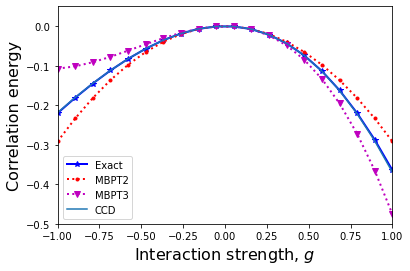

In [6]:
#---plot 
plt.axis([-1,1,-0.5,0.05])
plt.xlabel(r'Interaction strength, $g$', fontsize=16)
plt.ylabel(r'Correlation energy', fontsize=16)
fci = plt.plot(ga, exact,'b-*',linewidth = 2.0, label = 'Exact')
mbpt2 = plt.plot(ga, corr2,'r:.', linewidth = 2.0, label = 'MBPT2')
mbpt3 = plt.plot(ga, corr3, 'm:v',linewidth = 2.0, label = 'MBPT3')
ccd   = plt.plot(ga,e_ccd,label = 'CCD')
plt.legend()
#plt.savefig('perturbationtheory.pdf', format='pdf')
plt.show()  

# CCD for neutron matter (first on ladder approximation)

This code only include parts of diagrams.

In [11]:
import numpy as np

##############################################################
# CCD Program for neutron matter with the Minnesota potential.
#
# Thomas Papenbrock, July/August 2018
#
# License: Free Software following Version 3 of GNU General Public License, 
# see https://www.gnu.org/licenses/gpl.html
#######


##########################
# Class for neutron matter 
#######

class MomSpaceBasis:
    """
    momentum-space basis class
    The constructor has the form
    
    MomSpaceBasis(Nmax,kmax)
    
    param Nmax: Number of lattice points in positive kx-direction
    param kmax: Highest lattice momentum (in 1/fm)
    
    return: MomSpaceBasis as a single-partcle basis. 
    attributes of MomSpaceBasis are
    
    dk : lattice spacing in 1/fm
    Lbox : linear dimension (in fm) of cubic box
    nvec : lattice vectors (integers)
    kvec : lattice momentum vectors (floats, in 1/fm)
    ngrid : total number of lattice points 
    """
    def __init__(self,Nmax,kmax,ordered=True):
        """
        the constructor
        
        Generates a cubic lattice in momentum space
        param Nmax: Number of lattice points in positive kx-direction
        param kmax: Highest lattice momentum (in 1/fm)
        param ordered: Optional parameter, True by default, will order lattice points by kinetic energy
        
        return MomSpaceBasis
        """
        self.Nmax = Nmax
        self.dim = 0
        self.ngrid = 0
        self._kvec=[]
        self._nvec=[]

        dk = kmax / Nmax
        self.dk = dk
        self.Lbox = 2.0*np.pi/dk
        
        nx=[]
        nvec=[]
        for i in range(-Nmax,Nmax+1):
            self.dim=self.dim+1
            nx.append(i)
        
        #print('nx=',nx)
        
        for i in nx:
            for j in nx:
                for k in nx:
                    nvec.append(np.array([i,j,k], dtype=int))
                    
        #print('nvec=',nvec)
        self.ngrid=len(nvec)
        
        if ordered:
            #print("ordered")
            norm=np.zeros(self.ngrid,dtype=int)
            for i, vec in enumerate(nvec):
                npvec=np.array(vec,dtype=int)
                norm[i]=np.dot(npvec,npvec)
               # print(i, vec, norm[i])
        
            index=np.argsort(norm)
            #print(index)
            self._nvec=[]
            for i, ind in enumerate(index):
                #print(i, ind, nvec[ind])
                self._nvec.append(nvec[ind])
                
        else: 
            self._nvec=nvec  # a list
            
        self._kvec = np.array(self._nvec)*dk # a numpy array

    
    def kvec(self,indx=-1):
        """
        MomSpaceBasis.kvec(i) returns ith momentum vector
        MomSpaceBasis.kvec() returns all momentum vectors
        
        param indx: index of k-vector to be returned, optional
        return 3-vector (if index non-negative), or all vectors if no index specified
        """
        if indx == -1:
            return self._kvec
        else:
            return self._kvec[indx]
        
    def nvec(self,indx=-1):
        """
        MomSpaceBasis.nvec(i) returns ith lattice vector
        MomSpaceBasis.nvec() returns all lattice vectors
        
        param indx: index of lattice vector to be returned, optional
        return 3-vector (if index non-negative), or all lattice vectors if no index specified
        """
        if indx == -1:
            return self._nvec
        else:
            return self._nvec[indx]
        
    def dens(self,num):
        """
        returns density of system if num particles are present
        param num: int, number of particles
        return dens: float
        """
        return num/(self.Lbox)**3
    
    def update(self,dk):
        """
        Uses dk as new lattice spacing and rescales existing lattice
        param dk: in 1/fm lattice spacing in momentum space
        """
        self.Lbox=2.0*np.pi/dk
        self._kvec = np.array(self._nvec)*dk
    
    def __len__(self):
        """
        overloading of the 'len' function
        """
        return self.ngrid
    
    
############
# useful functions

def magic_numbers(basis):
    """
    param basis: MomSpaceBasis object
    return magic: array of magic numbers
    """
    nvecs = basis.nvec()
    vec=np.array(nvecs[0],dtype=int)
    norm = np.dot(vec,vec)
    magic=[]
    for i in range(1,len(nvecs)):
        vec=np.array(nvecs[i],dtype=int)
        norm2 = np.dot(vec,vec)
        if norm2 > norm: 
            magic.append(2*i)
            norm=norm2
    return magic


def get_dk(rho,Num):
    """
    param rho: desired density
    param Num: magic number of particles
    return dk: grid spacing in momentum space (in 1/fm)
    """
    Lbox = (Num/rho)**(1.0/3.0)
    dk = 2.0*np.pi/Lbox
    return dk

def spbasis_from_MomSpaceBasis(lattice_vecs,st_degen):
    """
    converts a lattice to a single particle basis for spin-isospin degeneracy st_degen
    param lattice_vecs: list of lattice vectors for 1st particle
    param st_degen: spin-isospin degeneracy
    return: basis as a list of momenta
    """
    if st_degen != 2: # for now only neutron matter
        print("Unexpected parameter st_degen")
        return lattice_vecs
    
    basis=[]
    for vec in lattice_vecs:
        for st in range(st_degen):
            basis.append(np.array(vec,dtype=int))
            
    return basis



#########################################################
# Functions for comparisons with infinite free Fermi gas
                         
def kF_from_density(rho,st_degen=2):
    """
    Computes Fermi momentum for given density and spin/isospin degeneracy.
    
    param rho: density in inverse fm cubed
    param st_degen: spin-isospin degeneracy; default 2
    return: Fermi momentum in inverse fm
    """
    res = (6.0*(np.pi)**2*rho/st_degen)**(1.0/3.0)
    return res

def EnergyDensity_FermiGas(kF,st_degen=2):
    """
    Computes energy density of free Fermi gas at Fermi momentum and spin/isospin degeneracy
    param kF: Fermi momentum in inverse fm
    param st_degen: spin-isospin degeneracy; default 2
    return: Energy density in MeV/fm**3
    """
    pvec = np.array([kF,0.0,0.0])
    erg = (st_degen*kF**3/(10.0*np.pi**2)) * Tkin(pvec)
    return erg


########################################################################################
# Functions for CCD of neutron matter
# Implementation uses only pp and hh ladders
#
# The key objects are lists of numpy matrices, holding the matrix elements V_pppp, 
# V_pphh, V_hhhh, T2_pphh, Hbar_pphh for each channel, i.e. each total two-body momentum.
# For fast computation, we also store the energy denominator and the relevant fock terms
# faa+fbb-fii-fjj as a pphh object. 
# 
########################################################################################

#====numba has problem====
#from numba import jit  
# compile a few functions to gain speed; should probably done in Fortran or C++, 
# and called from Python

#@jit(nopython=True)
def minnesota_nn(p_out,s1_out,s2_out,p_in,s1_in,s2_in,Lbox):
    """
    The Minnesota potential between two neutrons, not yet anti-symmetrized 
    param p_out: relative out momentum
    param p_in : relative in momentum
    param s1_out, s2_out: spin projections of out particles 1 and 2
    param s1_in, s2_in  : spin projections of in particles 1 and 2
    Lbox : size of momentum box
    return: value of potential in MeV; not anti-symmetrized!
    """
    # parameters. VT is not active between two neutrons (no triplet)
    VR = 200.0
    VS = -91.85  # sign typo in Lecture Notes Physics 936, Chap. 8
    kappaR = 1.487
    kappaS = 0.465
    
    qvec=p_out-p_in
    q2=np.dot(qvec,qvec)
    
    s1_i =spin2spinor(s1_in)
    s2_i =spin2spinor(s2_in)
    s1_o =spin2spinor(s1_out)
    s2_o =spin2spinor(s2_out)
    
    spin_part = 0.5 * ( np.dot(s1_i,s1_o)*np.dot(s2_i,s2_o)
                       -np.dot(s1_i,s2_o)*np.dot(s2_i,s1_o) )
    
    
    pot = spin_part * (  VR*np.exp(-0.25*q2/kappaR) / (Lbox*np.sqrt(kappaR))**3 
                       + VS*np.exp(-0.25*q2/kappaS) / (Lbox*np.sqrt(kappaS))**3 )
    
    pot = pot*(np.sqrt(np.pi))**3 

    
    return pot

#@jit
def spin_of_index(i):
    """
    Even indices of the lattive have spin up, odds have spin down
    param i: index of sp_basis
    return: spin as +/- 1
    """
    spin = 1-2*np.remainder(i,2)
    return spin

#@jit
def spin2spinor(s):
    """
    Makes a two-component spinor of an integer s
    param s: spin = +/- 1
    return: two-component numpy array [1,0] for up and [0,1] for down
    """
    up  =np.array([1.0,0.0])
    down=np.array([0.0,1.0])
    if s == 1:
        return up
    else:
        return down

#@jit
def Tkin(pvec):
    """
    Kinetic energy for a momentum vector
    param pvec: 3-component numpy array in inverse fm
    return: kinetic energy of that momentum in MeV
    """
    nucleon_mass = 938.92
    hbarc = 197.33
# More precise numbers for neutron mass and hbar follow.
# For N=14, this yields E_HF = 10.3337 MeV per nucleon in HF. Benchmarked with Ragnar Stroberg.
#     nucleon_mass = 939.56563
#     hbarc = 197.3269718
    p2 = np.dot(pvec,pvec)
    res = 0.5*hbarc**2*p2/nucleon_mass
    return res
    
#@jit
def compute_total_Tkin(Nocc,sp_basis,dk):
    """
    Computes total kinetic energy of reference state
    param Nocc, sp_basis, dk: particle number, integer s.p. lattice, delta k 
    return: total kinetic energy
    """
    erg=0.0
    for i in range(Nocc):
        mom_vec = sp_basis[i]
        vec=np.array(mom_vec)*dk
        erg=erg+Tkin(vec)
        
    return erg



#@jit
def Fock(pvec,s,sp_basis,Nocc,dk,Lbox):
    """
    Fock matrix of momentum pvec in hh space
    param pvec: 3-component numpy array in inverse fm
    param s: spin as +/- 1 of state
    param_sp_basis, Nocc, dk, Lbox : parameters of s.p. basis and system
    
    return: Fock matrix element = kinetic energy of that momentum in MeV
    """
    res = Tkin(pvec)
    
    dum=0.0
    for i in range(Nocc):
        vec=sp_basis[i]*dk
        si=spin_of_index(i)
        p_in = 0.5*(vec-pvec)
        p_out= p_in
        dum = dum + ( minnesota_nn(p_out,s,si, p_in, s,si,Lbox) 
                     -minnesota_nn(p_out,s,si,-p_in,si, s,Lbox) )  #antisymmetrized Minnesota
        
    res = res+dum
    return res

def compute_E_HF_simple(Nocc,sp_basis,dk):
    """
    Computes HF energy of reference state
    param Nocc, sp_basis, dk: particle number, integer s.p. lattice, delta k 
    return: total HF energy
    """
    erg=compute_total_Tkin(Nocc,sp_basis,dk)

    pot=0.0
    for i in range(Nocc):
        momi=sp_basis[i]*dk
        si = spin_of_index(i)
        for j in range(Nocc):
            momj=sp_basis[j]*dk
            sj = spin_of_index(j)
            p_rel = 0.5*(momi-momj)
            pot = pot + 0.5* (  minnesota_nn(p_rel,si,sj, p_rel,si,sj,Lbox)
                                - minnesota_nn(p_rel,si,sj,-p_rel,sj,si,Lbox) )
            
    erg = erg+pot
    return erg


def get_channels(sp_basis,start1,end1,start2,end2,identical,other_channels=None):
    """
    Returns channels for coupled cluster based on Minnesota potential
    param sp_Basis: A single-particle basis
    param start1: index to start for particle 1
    param end1: index to end for particle 1
    param start2: index to start for particle 2
    param end2: index to end for particle 2
    param identical: True for hh or pp, False for hp
    param other_channels: list of other channels to compare with
    return: channels, p_rel, t2amp. channels is a list of p12, where p12 is a momentum vector; 
            p_rel is a nested list with relative momenta and spins for each channel
    """
    channel=[]
    p_rel=[]
    for i, mom_vecs1 in enumerate(sp_basis[start1:end1]):
        #vec1=np.array(mom_vecs1,dtype=int)
        vec1=mom_vecs1
        spin1=spin_of_index(i)
            
        for j, mom_vecs2 in enumerate(sp_basis[start2:end2]):
            if identical and i==j: continue  #Fortran cycle
            #vec2=np.array(mom_vecs2,dtype=int)
            vec2=mom_vecs2
            spin2=spin_of_index(j)
                
            p12 = vec1+vec2
            prel= vec1-vec2
            spins=np.array([spin1,spin2],dtype=int)
            ps=[prel,spins]

            new=True
            needed=True
            if other_channels is not None: #check whether we need this channel
                needed=False
                for chan_o in other_channels:
                    if (chan_o==p12).all(): 
                        needed=True
                        break
            if needed: #check whether this channel exists already
                for ipos, chan in enumerate(channel):
                    if (chan==p12).all(): 
                        new=False
                        break
                    
            if needed and new: 
                channel.append(p12)
                p_rel.append([ps])
                
            if needed and not new:
                p_rel[ipos].append(ps)
                
    return channel, p_rel 
    

    
def setup_T2_amplitudes(sp_basis,NN,st_degen):
    """
    returns the t2 amplitudes and t2 channels
    param sp_basis: a sp_basis
    param NN: neutron number
    param st_degen: 2 for the moment, spin-isospin degeneracy
    return: hh_channels, pp_channels, p_rel_hh, p_rel_pp, t2amp
            these are the hh and pp channels of T2, lists of the relative momenta, 
            and t2amps as a list of numpy arrays set to zero 
    """
    num_states = len(sp_basis)
    
    hh_channels, p_rel_hh = get_channels(sp_basis,0,NN,0,NN,True)
    print('hh channels=', len(hh_channels))

    pp_channels, p_rel_pp = get_channels(sp_basis,NN,num_states,NN,num_states,True,hh_channels)
    print('pp channels=', len(pp_channels))
    
    if len(pp_channels) != len(hh_channels): print('pp and hh channels do not match')
     

    ordered_pp_channel=[]
    ordered_p_rel_pp=[]
    for i, chanhh in enumerate(hh_channels):
        for j, chanpp in enumerate(pp_channels):
            if (chanpp==chanhh).all():
                ordered_pp_channel.append(chanpp)
                ordered_p_rel_pp.append(p_rel_pp[j])    
                break
                
    pp_channels = ordered_pp_channel
    p_rel_pp = ordered_p_rel_pp
            
    # set t2 amplitudes to zero in each channel
    t2amp = fill_pot(Lbox, dk, pp_channels, hh_channels, p_rel_pp, p_rel_hh, True)
        
    return hh_channels, pp_channels, p_rel_hh, p_rel_pp, t2amp

def fill_pot(Lbox, dk, channels_out, channels_in, p_rel_out, p_rel_in, T2amp=False):
    """
    Fills lists of matrices such as Vhhhh, Vpphh, Vpppp, t2_pphh
    param Lbox: Lbox
    param dk: dk
    param channels_out, channels_in: the channels we have
    param p_rel_out, p_rel_in: the list of [prel, [s1,s2]]
    param T2amp=False: Set to True if t2_pphh needs to be computed
    return: The object of desire as a list of numpy matrices. 
            Contain matrix elements for potentials, zeros if T2amp=True is requested. 
    """
    Vpot=[]
    for i, chan_in in enumerate(channels_in):
        dim_in = len(p_rel_in[i])
        dim_out= len(p_rel_out[i])
        Vpot_chan=np.zeros((dim_out,dim_in))
        if not T2amp: 
            for ii, ps_i in enumerate(p_rel_in[i]):
                [pii, [s1, s2]] = ps_i
                pii = pii*dk*0.5
                for jj, ps_j in enumerate(p_rel_out[i]):
                    if dim_in == dim_out and jj > ii: continue
                    [pjj, [ss1, ss2]] = ps_j
                    pjj = pjj*dk*0.5
                    Vpot_chan[jj,ii] = ( minnesota_nn( pjj,ss1,ss2, pii,s1,s2,Lbox)
                                        -minnesota_nn(-pjj,ss2,ss1, pii,s1,s2,Lbox) )
                    if dim_in == dim_out : Vpot_chan[ii,jj] = Vpot_chan[jj,ii]
        
        Vpot.append(Vpot_chan)
    return Vpot


def init_V(Lbox, dk, hhchannels, ppchannels, p_relhh, p_relpp,zeros=False):
    """
    Sets up Vhhhh, Vpphh, and Vpppp. 
    param Lbox, dk :: lattice parameters in fm, 1/fm
    param hhchannels, ppchannels :: hh and pp channels as lists
    param p_relhh, p_relpp: relative momenta and spins as lists of lists for each hh and pp channel
    param zeros=False: kept from testing and debugging. True: sets to zero. False: sets correctly
    
    return: Vhhhh, Vpphh, Vpppp as a lists of numpy arrays
    """
    Vhhhh = fill_pot(Lbox, dk, hhchannels, hhchannels, p_relhh, p_relhh,zeros)
    Vpphh = fill_pot(Lbox, dk, ppchannels, hhchannels, p_relpp, p_relhh,zeros)
    Vpppp = fill_pot(Lbox, dk, ppchannels, ppchannels, p_relpp, p_relpp,zeros)
    
    return Vhhhh, Vpphh, Vpppp  
            
#@jit
def make_diagram(obj1,obj2,fac):
    """
    Makes diagrams for pp or hh ladders as matrix-matrix multiplications
    
    param obj1, obj2: lists of numpy matrices, one for each channel; will be contracted
    param fac: numerical factor
    return: T2_pphh object as fac*contraction(obj1,obj2)
    """
    hbar_pphh=[]
    dim1=len(obj1)
    for chan in range(dim1):
        mat1 = obj1[chan]
        mat2 = obj2[chan]
        hbar_pphh.append( fac*np.matmul(mat1,mat2) )
        
    return hbar_pphh


def make_diagrams2_3(t2_pphh,fabij):
    """
    fast implementation of diagrams 2 and 3 (Fock * T2) as element-by-element  multiply
    param t2_pphh, fabij:: pphh objects, i.e, a list of matrices, one for each channel
    returns: T2_pphh object, i.e, a list of matrices, one for each channel
    """
    hbar_pphh=[]
    for i, t2_mat in enumerate(t2_pphh):
        f_mat = fabij[i]
        hbar_mat = t2_mat*f_mat
        hbar_pphh.append(hbar_mat)
    return hbar_pphh


def compute_hbar(v_pppp,v_pphh,v_hhhh,t2_pphh,fabij):
    """
    Computes similarity-ytransformed Hamiltonian as pphh object
    param v_pppp,v_pphh,v_hhhh,t2_pphh,fabij : lists of matrices, one for each channel
    return Hbar_pphh: lists of matrices, one for each channel
    """
    diagram1 = v_pphh.copy()
    diagram23 = make_diagrams2_3(t2_pphh, fabij)
    diagram4 = make_diagram(v_pppp,t2_pphh,0.5)
    diagram5 = make_diagram(t2_pphh,v_hhhh,0.5)
    
    hbar_pphh=[]
    for i in range(len(t2_pphh)):
        mat = (  diagram1[i]
               + diagram23[i]
               + diagram4[i]
               + diagram5[i]  )
        hbar_pphh.append(mat)
    
    return hbar_pphh
    
def get_energy_denominator(hh_channels,p_rel_pp,p_rel_hh,sp_basis,Nocc,dk,Lbox,fock_mtx4):
    """
    computes energy denominator 1/(fii+fjj-faa-fbb) and (faa+fbb-fii-fjj) as pphh objects
    param: hh_channels,p_rel_pp,p_rel_hh,sp_basis,Nocc,dk,Lbox,fock_mtx4
    
    return denom, fabij: pphh objects, i.e. list of matrices, one for each channel
    """
    res=[]
    fabij=[]
    for i, Ptot in enumerate(hh_channels):
        dimhh=len(p_rel_hh[i])
        dimpp=len(p_rel_pp[i])
        res_mat = np.zeros((dimpp,dimhh))
        f_mat   = np.zeros((dimpp,dimhh))
        for ii, psh_rel in enumerate(p_rel_hh[i]):
            [pij, [si, sj]] = psh_rel  
            p_i = (Ptot+pij)//2
            p_i = p_i + np.array([Nmax,Nmax,Nmax],dtype=int)
            p_j = (Ptot-pij)//2
            p_j = p_j + np.array([Nmax,Nmax,Nmax],dtype=int)
            ssi = (1-si)//2
            ssj = (1-sj)//2
            fii = fock_mtx4[p_i[0],p_i[1],p_i[2],ssi]
            fjj = fock_mtx4[p_j[0],p_j[1],p_j[2],ssj]
            for jj, psp_rel in enumerate(p_rel_pp[i]):
                [pab, [sa, sb]] = psp_rel
                p_a = (Ptot+pab)//2
                p_a = p_a + np.array([Nmax,Nmax,Nmax],dtype=int)
                p_b = (Ptot-pab)//2
                p_b = p_b + np.array([Nmax,Nmax,Nmax],dtype=int)
                ssa = (1-sa)//2
                ssb = (1-sb)//2
                faa = fock_mtx4[p_a[0],p_a[1],p_a[2],ssa]
                fbb = fock_mtx4[p_b[0],p_b[1],p_b[2],ssb]
                
                res_mat[jj,ii] = 1.0 / (fii + fjj - faa - fbb) 
                f_mat[jj,ii] = faa + fbb - fii - fjj
        res.append(res_mat)
        fabij.append(f_mat)
    return res, fabij


def get_t2_from_mbpt(Vpphh,denom):
    """
    param Vpphh: Vpphh
    param denom: energy denominator in pphh format
    return t2: quotient of both, element for element 
    """
    res = []
    for i, vv in enumerate(Vpphh):
        dd = denom[i]
        res_mat = vv*dd  #how simple in python; element by element multiply
        res.append(res_mat)
    return res


def compute_E_CCD(Vpphh,T2pphh):
    """
    Computes CCD correlation energy given Hbar_pphh and T2_pphh
    param Vpphh, T2pphh: pphh objects of Hbar and T2
    return: correlation energy
    """
    erg=0.0
#     erg2=0.0
    for i, t2mat in enumerate(T2pphh):
        vmat  = Vpphh[i]
        erg = erg + 0.25*np.sum(vmat*t2mat)
    return erg


def compute_Fock_4(sp_basis,Nocc,dk,Lbox,Nmax):
    """
    computes Fock matrix (diagonal here) as array, with lattice vectors px,py,pz and spin si as input
    param sp_basis,Nocc,dk,Lbox,Nmax
    return: fock_mtx4[px,py,pz,si] as numpy array, lattice vectors shifted (start at 0, not -Nmax)
    """
    fock_mtx4=np.zeros(shape=(2*Nmax+1, 2*Nmax+1, 2*Nmax+1, 2))
    for i, vec in enumerate(sp_basis):
        pvec=vec*dk
        spin=spin_of_index(i)
        si = (1 - spin)//2
        px=vec[0]+Nmax
        py=vec[1]+Nmax
        pz=vec[2]+Nmax
        fock_mtx4[px,py,pz,si] = Fock(pvec,spin,sp_basis,Nocc,dk,Lbox)
    return fock_mtx4



In [12]:
#####################################
########### Main Program starts here    

from timeit import default_timer as timer
# for timing purposes

progstart=timer()

Nmax=2
kmax=1.0
mbase = MomSpaceBasis(Nmax,kmax)
lattice=mbase.nvec()

## set particle number
NN=14
st_degen=2  # spin up and down
print("chosen N =", NN)
print("magic numbers", magic_numbers(mbase))

## set density
rho=0.08

dk = get_dk(rho,NN)

mbase.update(dk)
Lbox = mbase.Lbox


## get single particle basis

sp_basis = spbasis_from_MomSpaceBasis(lattice,st_degen)
num_states = len(sp_basis)

print('number of s.p. states:', num_states)

# print out a few facts of the reference state
total_Tkin = compute_total_Tkin(NN,sp_basis,dk)
print('total Tkin per particle =', total_Tkin/NN )

k_fermi = kF_from_density(rho)

print("Fermi momentum =", k_fermi)

E_gas = EnergyDensity_FermiGas(k_fermi)

print("Energy per neutron of infinite free Fermi gas", E_gas/rho)

E_HF = compute_E_HF_simple(NN,sp_basis,dk)
E_HF = E_HF/NN
print("HF energy per neutron =", E_HF)

## now we start our business ...
## get all channels and two-body states within those channels; set T2 to zero
hh_channels, pp_channels, p_rel_hh, p_rel_pp, t2_pphh = setup_T2_amplitudes(sp_basis,NN,st_degen)

# get some insight in how big this all is
count=0
for i, channel in enumerate(p_rel_hh):
    dim=len(p_rel_hh[i])
    count=count+dim

print('hh number of total combinations', count)

count=0
for i, channel in enumerate(p_rel_pp):
    dim=len(p_rel_pp[i])
    count=count+dim
    
print('pp number of total combinations', count)


print("get v_hhhh, v_pphh, v_pppp")
start = timer()
v_hhhh, v_pphh, v_pppp = init_V(Lbox, dk, hh_channels, pp_channels, p_rel_hh, p_rel_pp)
end = timer()
print("what a hog!", end-start, 'seconds')


print("compute energy denominator")
start = timer()
fock_mtx4 = compute_Fock_4(sp_basis,NN,dk,Lbox,Nmax)
denom_pphh, f_abij = get_energy_denominator(pp_channels,p_rel_pp,p_rel_hh,
                                            sp_basis,NN,dk,Lbox,fock_mtx4)
end = timer()
print("that's faster", end-start, 'seconds')

print("Initialize T2 from MBPT2")
t2_pphh = get_t2_from_mbpt(v_pphh,denom_pphh)

erg = compute_E_CCD(v_pphh,t2_pphh)
print('MBPT2 correlation energy per neutron =', erg/NN)


print("start CCD iterations ...")

niter=200
mix=0.99
erg_old=0.0
eps=1.e-8
for iter in range(niter):
    
    start = timer()
    hbar_pphh = compute_hbar(v_pppp,v_pphh,v_hhhh,t2_pphh,f_abij)
    end = timer()
    print("time of making Hbar:", end-start, 'seconds')
    
    t2_new = get_t2_from_mbpt(hbar_pphh,denom_pphh)
    
    for i in range(len(t2_new)):
        t2_new[i] = t2_pphh[i] + t2_new[i]
    
    erg = compute_E_CCD(v_pphh,t2_new)
    
    myeps = abs(erg-erg_old)/abs(erg)
    if myeps < eps: break
    erg_old=erg

    print("iter=", iter, "Correlation energy per neutron=", erg/NN, ", epsilon=", myeps)
    
    for i in range(len(t2_pphh)):
        t2_pphh[i] = mix*t2_new[i] + (1.0-mix)*t2_pphh[i]
    
print("Correlation energy per neutron={} at rho = {} ".format(erg/NN,rho))
print("Energy per neutron ={} ".format(E_HF+erg/NN))
progend=timer()
print('total time in seconds', progend-progstart)

chosen N = 14
magic numbers [2, 14, 38, 54, 66, 114, 162, 186, 234]
number of s.p. states: 250
total Tkin per particle = 22.42755311959275
Fermi momentum = 1.3330210137859975
Energy per neutron of infinite free Fermi gas 22.10817470276664
HF energy per neutron = 10.349801450196429
hh channels= 25
pp channels= 25
hh number of total combinations 182
pp number of total combinations 7384
get v_hhhh, v_pphh, v_pppp
what a hog! 56.60207840000004 seconds
compute energy denominator
that's faster 0.750307199999952 seconds
Initialize T2 from MBPT2
MBPT2 correlation energy per neutron = -0.6293441812016368
start CCD iterations ...
time of making Hbar: 0.008005699999898752 seconds
iter= 0 Correlation energy per neutron= -0.6785734684633049 , epsilon= 1.0
time of making Hbar: 0.004996799999958057 seconds
iter= 1 Correlation energy per neutron= -0.6897534932303374 , epsilon= 0.016208725112319283
time of making Hbar: 0.004245700000069519 seconds
iter= 2 Correlation energy per neutron= -0.691804804186